### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt 

### Importing data

In [2]:
campaign_desc = pd.read_csv('data/campaign_desc.csv') 
campaign_table = pd.read_csv('data/campaign_table.csv')
causal_data = pd.read_csv('data/causal_data.csv') 
coupon_redempt = pd.read_csv('data/coupon_redempt.csv') 
coupon = pd.read_csv('data/coupon.csv') 
hh_demographic = pd.read_csv('data/hh_demographic.csv') 
product = pd.read_csv('data/product.csv') 
transaction_data = pd.read_csv('data/transaction_data.csv') 

### Analysing data (Table-wise)

As the data is contained in various tables, first we have a look at the what data we have in the individual tables, check for null values and then join certain tables using a common field as the key so that we can make better predictions.

### Campaign Description

In [3]:
campaign_desc.head()

,DESCRIPTION,CAMPAIGN,START_DAY,END_DAY
0,TypeB,24,659,719
1,TypeC,15,547,708
2,TypeB,25,659,691
3,TypeC,20,615,685
4,TypeB,23,646,684


In [4]:
campaign_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   DESCRIPTION  30 non-null     object
 1   CAMPAIGN     30 non-null     int64 
 2   START_DAY    30 non-null     int64 
 3   END_DAY      30 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30
- START_DAY  : Start date of campaign
- END_DAY    : End date of campaign

In [5]:
campaign_table.head()

,DESCRIPTION,household_key,CAMPAIGN
0,TypeA,17,26
1,TypeA,27,26
2,TypeA,212,26
3,TypeA,208,26
4,TypeA,192,26


In [6]:
campaign_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7208 entries, 0 to 7207
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION    7208 non-null   object
 1   household_key  7208 non-null   int64 
 2   CAMPAIGN       7208 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 169.1+ KB


Basic info about the columns above:
- DESCRIPTION: Type of campaign (TypeA, TypeB or TypeC)
- HOUSEHOLD  : Uniquely identifies each household
- CAMPAIGN   : Uniquely identifies each campaign. Ranges 1-30

In [7]:
campaigndata = pd.merge(campaign_desc, campaign_table, how="inner", on=["CAMPAIGN"])

In [8]:
campaigndata.head()

,DESCRIPTION_x,CAMPAIGN,START_DAY,END_DAY,DESCRIPTION_y,household_key
0,TypeB,24,659,719,TypeB,31
1,TypeB,24,659,719,TypeB,149
2,TypeB,24,659,719,TypeB,332
3,TypeB,24,659,719,TypeB,371
4,TypeB,24,659,719,TypeB,518


In [9]:
campaigndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7208 entries, 0 to 7207
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DESCRIPTION_x  7208 non-null   object
 1   CAMPAIGN       7208 non-null   int64 
 2   START_DAY      7208 non-null   int64 
 3   END_DAY        7208 non-null   int64 
 4   DESCRIPTION_y  7208 non-null   object
 5   household_key  7208 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 394.2+ KB


### Product and Coupon information

In [10]:
causal_data.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer
0,26190,286,70,0,A
1,26190,288,70,0,A
2,26190,289,70,0,A
3,26190,292,70,0,A
4,26190,293,70,0,A


In [11]:
causal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36786524 entries, 0 to 36786523
Data columns (total 5 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   PRODUCT_ID  int64 
 1   STORE_ID    int64 
 2   WEEK_NO     int64 
 3   display     object
 4   mailer      object
dtypes: int64(3), object(2)
memory usage: 1.4+ GB


Basic info about the columns above:
- PRODUCT_ID: Uniquely identifies each product
- STORE_ID  : Identifies unique stores
- WEEK_NO   : Week of the transaction
- display   : Display location
- mailer    : Mailer location

In [12]:
product.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [13]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92353 entries, 0 to 92352
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PRODUCT_ID            92353 non-null  int64 
 1   MANUFACTURER          92353 non-null  int64 
 2   DEPARTMENT            92353 non-null  object
 3   BRAND                 92353 non-null  object
 4   COMMODITY_DESC        92353 non-null  object
 5   SUB_COMMODITY_DESC    92353 non-null  object
 6   CURR_SIZE_OF_PRODUCT  92353 non-null  object
dtypes: int64(2), object(5)
memory usage: 4.9+ MB


Basic info about the columns above:
- PRODUCT_ID          : Uniquely identifies each product
- MANUFACTURER        : Code that links product with same manufacturer together
- DEPARTMENT          : Groups similar product together
- BRAND               : Indicates Private or National label brand
- COMMODITY_DESC      : Groups similar product together at a lower level
- SUB_COMMODITY_DESC  : Groups similar product together at the lower level
- CURR_SIZE_OF_PRODUCT: Indicates package size (not available for all products)

In [14]:
coupon.head()

,COUPON_UPC,PRODUCT_ID,CAMPAIGN
0,10000089061,27160,4
1,10000089064,27754,9
2,10000089073,28897,12
3,51800009050,28919,28
4,52100000076,28929,25


In [15]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124548 entries, 0 to 124547
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   COUPON_UPC  124548 non-null  int64
 1   PRODUCT_ID  124548 non-null  int64
 2   CAMPAIGN    124548 non-null  int64
dtypes: int64(3)
memory usage: 2.9 MB


Basic info about the columns above:
- COUPON_UPC: Uniquely identifies each coupon (unique to household and campaign)
- PRODUCT_ID: Uniquely identifies each product
- CAMPAIGN  : Uniquely identifies each campaign. Ranges 1-30

In [16]:
storeproducts = pd.merge(causal_data,product, how="inner", on=["PRODUCT_ID"])
storeCoupons = pd.merge(storeproducts,coupon, how="inner", on=["PRODUCT_ID"])

In [17]:
storeproducts.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
1,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
2,26190,289,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
3,26190,292,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26190,293,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ


In [18]:
storeproducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36786524 entries, 0 to 36786523
Data columns (total 11 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
dtypes: int64(4), object(7)
memory usage: 3.3+ GB


In [19]:
storeCoupons.head()

,PRODUCT_ID,STORE_ID,WEEK_NO,display,mailer,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT,COUPON_UPC,CAMPAIGN
0,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
1,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26
2,26190,286,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089038,8
3,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,10000089133,13
4,26190,288,70,0,A,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ,51111070150,26


In [20]:
storeCoupons.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84456055 entries, 0 to 84456054
Data columns (total 13 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   PRODUCT_ID            int64 
 1   STORE_ID              int64 
 2   WEEK_NO               int64 
 3   display               object
 4   mailer                object
 5   MANUFACTURER          int64 
 6   DEPARTMENT            object
 7   BRAND                 object
 8   COMMODITY_DESC        object
 9   SUB_COMMODITY_DESC    object
 10  CURR_SIZE_OF_PRODUCT  object
 11  COUPON_UPC            int64 
 12  CAMPAIGN              int64 
dtypes: int64(6), object(7)
memory usage: 8.8+ GB


### Households and Coupon redemptions

In [21]:
coupon_redempt.head()

,household_key,DAY,COUPON_UPC,CAMPAIGN
0,1,421,10000085364,8
1,1,421,51700010076,8
2,1,427,54200000033,8
3,1,597,10000085476,18
4,1,597,54200029176,18


In [22]:
coupon_redempt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   household_key  2318 non-null   int64
 1   DAY            2318 non-null   int64
 2   COUPON_UPC     2318 non-null   int64
 3   CAMPAIGN       2318 non-null   int64
dtypes: int64(4)
memory usage: 72.6 KB


Basic info about the columns above:
- household_key: Uniquely identifies each household
- DAY          : Day when transaction occurred
- COUPON_UPC   : Uniquely identifies each coupon (unique to household and campaign)
- CAMPAIGN     : Uniquely identifies each campaign

In [23]:
hh_demographic.head()

,AGE_DESC,MARITAL_STATUS_CODE,INCOME_DESC,HOMEOWNER_DESC,HH_COMP_DESC,HOUSEHOLD_SIZE_DESC,KID_CATEGORY_DESC,household_key
0,65+,A,35-49K,Homeowner,2 Adults No Kids,2,None/Unknown,1
1,45-54,A,50-74K,Homeowner,2 Adults No Kids,2,None/Unknown,7
2,25-34,U,25-34K,Unknown,2 Adults Kids,3,1,8
3,25-34,U,75-99K,Homeowner,2 Adults Kids,4,2,13
4,45-54,B,50-74K,Homeowner,Single Female,1,None/Unknown,16


In [24]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


Basic info about the columns above:
- AGE_DESC           : Estimated age range
- MARITAL_STATUS_CODE: Marital Status (A - Married, B - Single, U - Unknown)
- INCOME_DESC        : Household income
- HOMEOWNER_DESC     : Homeowner, renter, etc.
- HH_COMP_DESC       : Household composition
- HOUSEHOLD_SIZE_DESC: Size of household up to 5+
- KID_CATEGORY_DESC  : Number of children present up to 3+
- household_key      : Uniquely identifies each household

In [25]:
transaction_data.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,2375,26984851472,1,1004906,1,1.39,364,-0.60,1631,1,0.0,0.0
1,2375,26984851472,1,1033142,1,0.82,364,0.00,1631,1,0.0,0.0
2,2375,26984851472,1,1036325,1,0.99,364,-0.30,1631,1,0.0,0.0
3,2375,26984851472,1,1082185,1,1.21,364,0.00,1631,1,0.0,0.0
4,2375,26984851472,1,8160430,1,1.50,364,-0.39,1631,1,0.0,0.0


In [26]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


Basic info about the columns above:
- household_key      : Uniquely identifies each household
- BASKET_ID          : Uniquely identifies a purchase occasion
- DAY                : Day when transaction occurred
- PRODUCT_ID         : Uniquely identifies each product
- QUANTITY           : Number of the products purchased during the trip
- SALES_VALUE        : Amount of dollars retailer receives from sale
- STORE_ID           : Identifies unique stores
- RETAIL_DISC        : Discount applied due to retailer's loyalty card program
- TRANS_TIME         : Time of day when the transaction. Ranges 1-102
- WEEK_NO            : Week of the transaction. Ranges 1-102
- COUPON_DISC        : Discount applied due to manufacturer coupon
- COUPON_MATCH_DISC  : Discount applied due to retailer's match of manufacturer coupon

- Information on all of the above:
- campaign_desc - Campaign description, when it started , ended and type
- campaign_table - Household related to the campaign
- campaigndata - Inner join merge between the above 2.
- causal_data - Info on products and which store has them
- product - Product information
- coupon - Coupons related to each product
- storeproducts - Inner join merge between causal data and product
- storeCoupons - Inner join merge between storeproducts and coupon
- coupon_redempt - which household has which coupon
- hh_demographic - As the name says, household demographics
- transaction_data - Transaction history of each household
- couponRedemptions - Inner join merge of coupon redemptions and hh data
- hhTransactions - Probably redundant but inner join merge between couponRedemptions and   transaction_data

### Visualizations And Analysis

#### Mean Median and Standard Deviation
For the Mean Median and SD, we will be examining the transaction data table.


In [27]:
transaction_data[["SALES_VALUE", "QUANTITY", "RETAIL_DISC"]].describe()

,SALES_VALUE,QUANTITY,RETAIL_DISC
count,2.595732e+06,2.595732e+06,2.595732e+06
mean,3.104120e+00,1.004286e+02,-5.387054e-01
std,4.182274e+00,1.153436e+03,1.249191e+00
min,0.000000e+00,0.000000e+00,-1.800000e+02
25%,1.290000e+00,1.000000e+00,-6.900000e-01
50%,2.000000e+00,1.000000e+00,-1.000000e-02
75%,3.490000e+00,1.000000e+00,0.000000e+00
max,8.400000e+02,8.963800e+04,3.990000e+00


The maximum quantity of 896380 does not make sense. This requires further
investigation.

In [28]:
transaction_data[transaction_data["QUANTITY"] == 89638]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
1750942,630,34749153595,503,6534178,89638,250.0,384,-13.45,1927,73,0.0,0.0


This is very suspicious because purchasing 89638 quantity of something
will logically result in a SALES_VALUE of greater than 250. We will drop
rows where the QUANTITY is greater than the median.

In [29]:
transaction_data = transaction_data[transaction_data["QUANTITY"] <= 100]

In [30]:
transaction_data[["SALES_VALUE", "QUANTITY", "RETAIL_DISC"]].describe()

,SALES_VALUE,QUANTITY,RETAIL_DISC
count,2.572596e+06,2.572596e+06,2.572596e+06
mean,2.897122e+00,1.304541e+00,-5.356659e-01
std,3.376942e+00,9.304023e-01,1.251960e+00
min,0.000000e+00,0.000000e+00,-1.800000e+02
25%,1.260000e+00,1.000000e+00,-6.600000e-01
50%,2.000000e+00,1.000000e+00,0.000000e+00
75%,3.390000e+00,1.000000e+00,0.000000e+00
max,8.400000e+02,9.800000e+01,3.990000e+00


In [31]:
trans_data_baskets_hh_key = pd.DataFrame(transaction_data.groupby(['household_key', 'BASKET_ID']).sum()).drop(['DAY', 'PRODUCT_ID', 'STORE_ID', 'RETAIL_DISC', 'TRANS_TIME', 'WEEK_NO', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1)
trans_data_baskets_hh_key = trans_data_baskets_hh_key.merge(transaction_data.drop(['QUANTITY','SALES_VALUE', 'PRODUCT_ID', 'RETAIL_DISC', 'COUPON_DISC', 'COUPON_MATCH_DISC'], axis=1), on="BASKET_ID").drop_duplicates(subset=['BASKET_ID'])

hh_transactions = trans_data_baskets_hh_key.merge(hh_demographic, on='household_key')

#### The different age groups in the dataset

In [32]:
# Get the unique age_groups in AGE_DSC
age_groups = sorted(list(hh_transactions.AGE_DESC.unique()))
print("The different age_group buckets in the dataset are " + str(age_groups) + ".")

# Create empty list of to store dataframes
age_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in age_groups:
    age_group_spending_dfs.append(hh_transactions[hh_transactions['AGE_DESC'] == group])
    
    
# Group and Name the Transaction Spending DataFrames by Age Group
age_19_24 = age_group_spending_dfs[0]
age_25_34 = age_group_spending_dfs[1]
age_35_44 = age_group_spending_dfs[2]
age_45_54 = age_group_spending_dfs[3]
age_55_64 = age_group_spending_dfs[4]
age_65 = age_group_spending_dfs[5]

The different age_group buckets in the dataset are ['19-24', '25-34', '35-44', '45-54', '55-64', '65+'].


#### The different income groups in the dataset

In [33]:
#  Get the unique age_groups in INCOME_DESC
income_groups = sorted(list(hh_transactions.INCOME_DESC.unique()))
print("The different income buckets in the dataset are " + str(income_groups) + ".")

# Create empty list of to store dataframes
income_group_spending_dfs = []

# append each individual age group dataframe to the list
for group in income_groups:
    income_group_spending_dfs.append(hh_transactions[hh_transactions['INCOME_DESC'] == group])
    

#  Group and Name the Transaction Spending DataFrames by Income Group
inc_100_124K = income_group_spending_dfs[0]
inc_125_149K = income_group_spending_dfs[1]
inc_15_24K = income_group_spending_dfs[2]
inc_150_174K = income_group_spending_dfs[3]
inc_175_199K = income_group_spending_dfs[4]
inc_200_249K = income_group_spending_dfs[5]
inc_25_34K = income_group_spending_dfs[6]
inc_250K = income_group_spending_dfs[7]
inc_35_49K = income_group_spending_dfs[8]
inc_50_74K = income_group_spending_dfs[9]
inc_75_99K = income_group_spending_dfs[10]
inc_Under_15K = income_group_spending_dfs[11]

The different income buckets in the dataset are ['100-124K', '125-149K', '15-24K', '150-174K', '175-199K', '200-249K', '25-34K', '250K+', '35-49K', '50-74K', '75-99K', 'Under 15K'].


#### Average Transaction Basket Sales Value by Week for Age Group 19-24

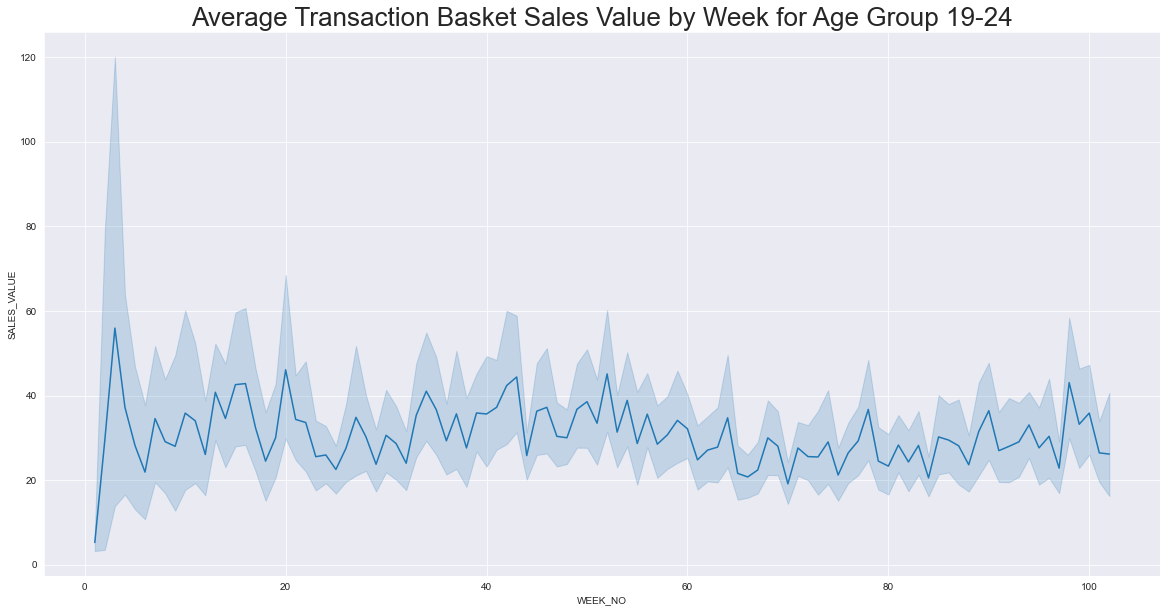

In [34]:
sns.set_style("darkgrid")

avg_weekly_sales_19_24 = age_19_24[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Age Group 19-24", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_19_24,
                  markers=True)

#### Average Transaction Basket Sales Value by Week for Income Under 15K

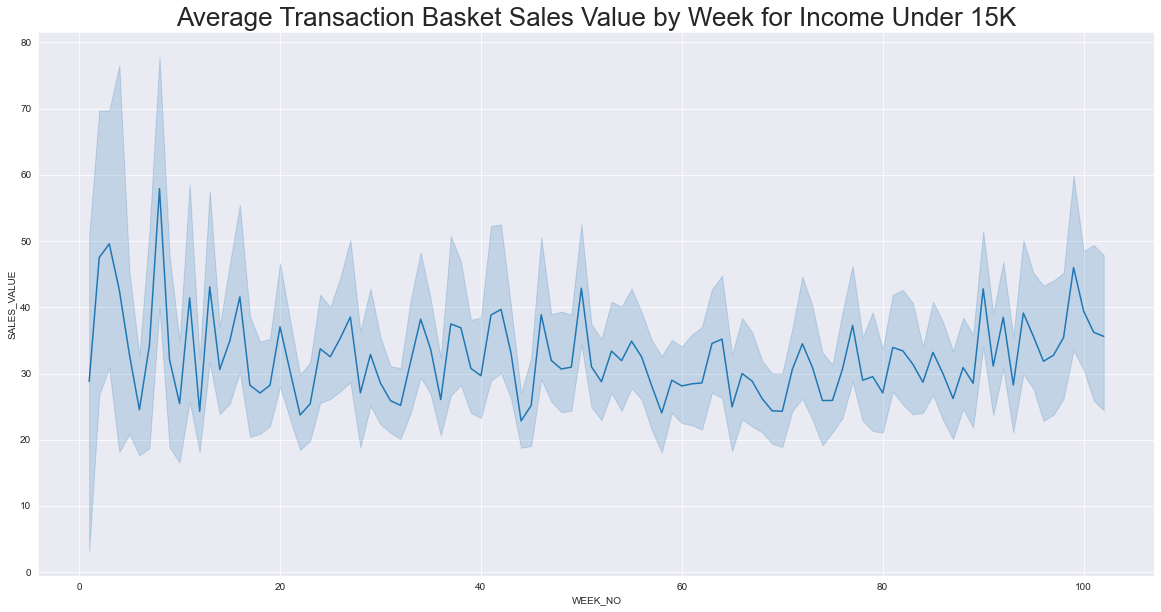

In [35]:
sns.set_style("darkgrid")

avg_weekly_sales_inc_Under_15K = inc_Under_15K[['WEEK_NO', 'SALES_VALUE', 'household_key']].groupby(['WEEK_NO', 'household_key']).mean().reset_index()
plt.figure(figsize=(20,10))
plt.title("Average Transaction Basket Sales Value by Week for Income Under 15K", size=26)
ax = sns.lineplot(x='WEEK_NO', y='SALES_VALUE',
                  data=avg_weekly_sales_inc_Under_15K,
                  markers=True)

## Box Plot

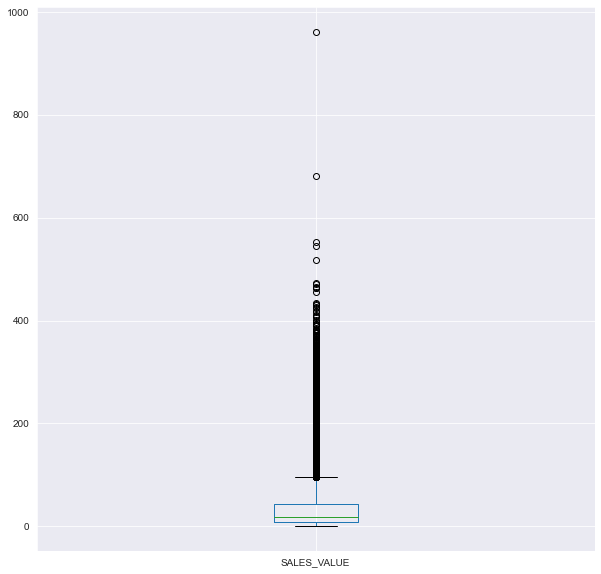

In [36]:
hh_transactions.boxplot(column = ['SALES_VALUE'], figsize=(10,10))
plt.show()

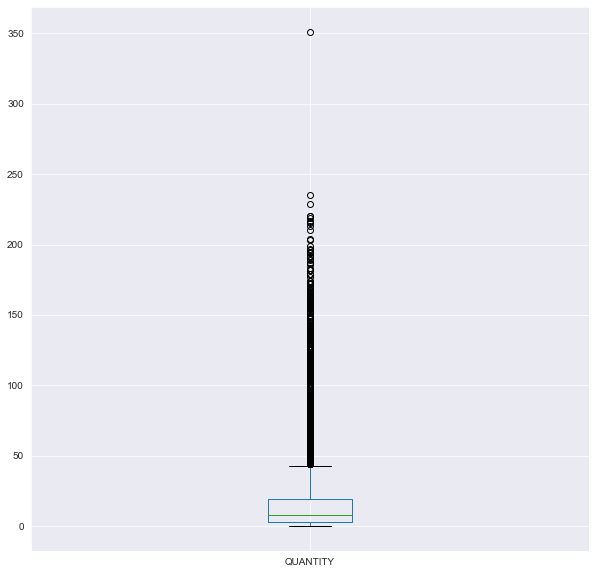

In [37]:
hh_transactions.boxplot(column = ['QUANTITY'], figsize=(10,10))
plt.show()

In [38]:
features = ['DAY','SALES_VALUE', 'QUANTITY']

## Pairplot

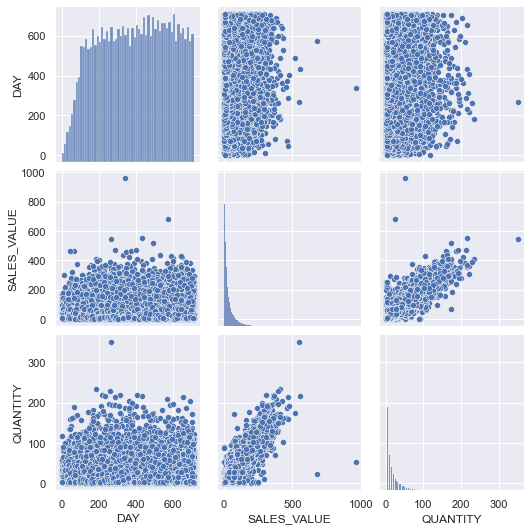

In [39]:
sns.set()
sns.pairplot(hh_transactions[features])

## Scatterplot


<AxesSubplot:xlabel='SALES_VALUE', ylabel='QUANTITY'>

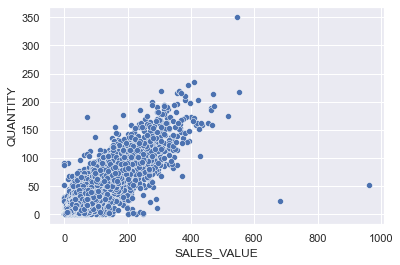

In [46]:
sns.scatterplot(data = hh_transactions, x = 'SALES_VALUE', y = 'QUANTITY')

This scatter plot shows a strong correlation between quantity and sales value.

In [47]:
# calculate Pearson's correlation
from scipy.stats import pearsonr
# calculate Pearson's correlation between SALES_VALUE and QUANTITY
corr, _ = pearsonr(hh_transactions['SALES_VALUE'], hh_transactions['QUANTITY'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.914


In [40]:
## Calculate the correlation
hh_transactions.corr()

,BASKET_ID,QUANTITY,SALES_VALUE,household_key,DAY,STORE_ID,TRANS_TIME,WEEK_NO
BASKET_ID,1.000000,0.008771,0.019304,0.000292,0.959857,0.052280,-0.014318,0.959801
QUANTITY,0.008771,1.000000,0.914175,0.041317,0.009666,-0.020709,-0.006076,0.009256
SALES_VALUE,0.019304,0.914175,1.000000,0.046332,0.017447,-0.005059,-0.007918,0.016939
household_key,0.000292,0.041317,0.046332,1.000000,0.003909,0.027398,0.003455,0.003808
DAY,0.959857,0.009666,0.017447,0.003909,1.000000,0.047641,-0.014213,0.999940
STORE_ID,0.052280,-0.020709,-0.005059,0.027398,0.047641,1.000000,-0.018426,0.047605
TRANS_TIME,-0.014318,-0.006076,-0.007918,0.003455,-0.014213,-0.018426,1.000000,-0.013786
WEEK_NO,0.959801,0.009256,0.016939,0.003808,0.999940,0.047605,-0.013786,1.000000


In [41]:
# dummy variables
age_dum = pd.get_dummies(hh_transactions['AGE_DESC'])
marital_status_dum = pd.get_dummies(hh_transactions['MARITAL_STATUS_CODE'])
income_dum = pd.get_dummies(hh_transactions['INCOME_DESC'])
homeowner_dum = pd.get_dummies(hh_transactions['HOMEOWNER_DESC'])
child_dum = pd.get_dummies(hh_transactions['HH_COMP_DESC'])
hh_size_dum = pd.get_dummies(hh_transactions['HOUSEHOLD_SIZE_DESC'])
kid_category_dum = pd.get_dummies(hh_transactions['KID_CATEGORY_DESC'])


hh_transactions = pd.concat([hh_transactions, age_dum, marital_status_dum, income_dum, homeowner_dum, child_dum, hh_size_dum, kid_category_dum], axis=1) 

hh_transactions = hh_transactions.drop(columns = ['AGE_DESC', 'MARITAL_STATUS_CODE', 'INCOME_DESC', 'HOMEOWNER_DESC', 'HH_COMP_DESC', 'HOUSEHOLD_SIZE_DESC', 'KID_CATEGORY_DESC'])

hh_transactions.columns

BASKET_ID
QUANTITY
SALES_VALUE
household_key
DAY
STORE_ID
TRANS_TIME
WEEK_NO
19-24
25-34
35-44
45-54
55-64
65+
A
B
U
100-124K
125-149K
15-24K
150-174K
175-199K
200-249K
25-34K
250K+
35-49K
50-74K
75-99K
Under 15K
Homeowner
Probable Owner
Probable Renter
Renter
Unknown
1 Adult Kids
2 Adults Kids
2 Adults No Kids
Single Female
Single Male
Unknown
1
2
3
4
5+
1
2
3+
None/Unknown
